In [604]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#imoprt the data
df = pd.read_csv(r'C:\Users\user\Downloads\enhanced_sur_covid_19_eng.csv')
#show the data by first 5 rows to ensure the dataset is correct
df.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63,NaN,Discharged,Non-HK resident,Imported case,Confirmed


## General information of the data

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Case no.                          5242 non-null   int64  
 1   Report date                       5242 non-null   object 
 2   Date of onset                     5242 non-null   object 
 3   Gender                            5242 non-null   object 
 4   Age                               5242 non-null   int64  
 5   Name of hospital admitted         0 non-null      float64
 6   Hospitalised/Discharged/Deceased  5242 non-null   object 
 7   HK/Non-HK resident                5242 non-null   object 
 8   Case classification*              5242 non-null   object 
 9   Confirmed/probable                5242 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 409.7+ KB


In [606]:
df.shape
#showing the data frame has how many rows and columns, represent the format by (rows, columns).

(5242, 10)

From the above table, we can know that there are 5242 index(rows) and 10 attributes(columns)
However, there are some columns may not be useful for the modeling.
Therefore, we need to drop out the irrelevant columns.
Also, we can see that there are no null value in each columns except the 'Name of hospital admitted' column.

## Data Cleaning

### Drop the irrelevant columns

In [607]:
df.drop(['Case no.','Name of hospital admitted'], axis = 1, inplace = True)

Before we go into the data cleaning stage,

we have to change some of the columns name

because it can be easier to access the columns when doing the data cleaning.

In [608]:
df.rename(columns={'HK/Non-HK resident':'HKer_or_not',
                   'Report date':'Report_date',
                  'Date of onset':'Date_of_onset',
                  'Case classification*':'Case_classification'},inplace = True)
#the pandas rename function can change the column/index name
#for changing the index name, just replace the "columns" to "index"
df.head()

,Report_date,Date_of_onset,Gender,Age,Hospitalised/Discharged/Deceased,HKer_or_not,Case_classification,Confirmed/probable
0,23/01/2020,21/01/2020,M,39,Discharged,Non-HK resident,Imported case,Confirmed
1,23/01/2020,18/01/2020,M,56,Discharged,HK resident,Imported case,Confirmed
2,24/01/2020,20/01/2020,F,62,Discharged,Non-HK resident,Imported case,Confirmed
3,24/01/2020,23/01/2020,F,62,Discharged,Non-HK resident,Imported case,Confirmed
4,24/01/2020,23/01/2020,M,63,Discharged,Non-HK resident,Imported case,Confirmed


In [609]:
# Checking there is no null value in each columns
Features = df.columns
num_of_null_by_cols = df.isnull().sum().sort_values(ascending=False)
percentage_of_null_by_cols = (df.isnull().sum() / len(df)).sort_values(ascending=False)
null_df = pd.DataFrame({'Number of Null': num_of_null_by_cols,
                                'Percentage of Null':percentage_of_null_by_cols})
null_df.index.name = 'Features'
null_df

,Number of Null,Percentage of Null
Features,,
Confirmed/probable,0,0.0
Case_classification,0,0.0
HKer_or_not,0,0.0
Hospitalised/Discharged/Deceased,0,0.0
Age,0,0.0
Gender,0,0.0
Date_of_onset,0,0.0
Report_date,0,0.0


### Drop the Unknown/Meaningless index

In [610]:
#Cleaning the irrelevant(probable) index from 'Confirmed/probable'
df['Confirmed/probable'].unique()

array(['Confirmed', 'Probable'], dtype=object)

In [611]:
df.drop(df[df['Confirmed/probable'] == 'Probable'].index, axis=0,inplace=True)

In [612]:
#Cleaning the irrelevant(probable) index from 'Case_classification'
df['Case_classification'].unique()

array(['Imported case', 'Epidemiologically linked with imported case',
       'Possibly local case', 'Local case',
       'Epidemiologically linked with local case',
       'Epidemiologically linked with possibly local case'], dtype=object)

In [613]:
df.drop(df[df['Case_classification'] == 'Possibly local case'].index, axis=0, inplace=True)
df.drop(df[df['Case_classification'] == 'Epidemiologically linked with possibly local case'].index, axis=0, inplace=True)

In [614]:
# Cleaning the unknown/irrelevant index from 'Date_of_onset'

df['Date_of_onset'].unique()

array(['21/01/2020', '18/01/2020', '20/01/2020', '23/01/2020',
       '25/01/2020', '28/01/2020', '29/01/2020', '01/02/2020',
       '22/01/2020', '30/01/2020', '04/02/2020', '26/01/2020',
       '03/02/2020', '02/02/2020', '07/02/2020', '08/02/2020',
       '05/02/2020', '31/01/2020', '12/02/2020', '11/02/2020',
       '10/02/2020', '18/02/2020', '20/02/2020', '24/02/2020',
       'Asymptomatic', '17/02/2020', '16/02/2020', '15/02/2020',
       '28/02/2020', '23/02/2020', '09/03/2020', '04/03/2020',
       '07/03/2020', '06/03/2020', '08/03/2020', '10/03/2020',
       '03/03/2020', '12/03/2020', '02/03/2020', '11/03/2020',
       '13/03/2020', '15/03/2020', '05/03/2020', '16/03/2020',
       '17/03/2020', '18/03/2020', '14/03/2020', '19/03/2020',
       '20/03/2020', '21/03/2020', '22/03/2020', '23/03/2020',
       '24/03/2020', '25/03/2020', '26/03/2020', 'January', '27/03/2020',
       '28/03/2020', '29/03/2020', '30/03/2020', '31/03/2020',
       '01/04/2020', '02/04/2020', '03/04/

From the above result, we can see that the Date_of_onset column not only contains the date but also the string.
Therefore, we need to drop out the index which contain the string.

In [615]:
#df[df['Date_of_onset'] == 'Unknown'].index == getting the index no.

df.drop(df[df['Date_of_onset'] == 'Unknown'].index, axis=0, inplace=True)
df.drop(df[df['Date_of_onset'] == 'Asymptomatic'].index, axis=0, inplace=True)
df.drop(df[df['Date_of_onset'] == 'January'].index, axis=0, inplace=True)
df.drop(df[df['Date_of_onset'] == 'Pending'].index, axis=0, inplace=True)
df.drop(df[df['Date_of_onset'] == 'Mid-July'].index, axis=0, inplace=True)
df.drop(df[df['Date_of_onset'] == 'Mid-March'].index, axis=0, inplace=True)

In [616]:
# Cleaning the unknown/irrelevant index from 'Hospitalised/Discharged/Deceased'

df['Hospitalised/Discharged/Deceased'].unique()

array(['Discharged', 'Deceased', 'Hospitalised', 'To be provided'],
      dtype=object)

From the above, 'To be provided' and 'Hospitalised' may not useful for the modeling 

because in this project, we would like to predict the patient live or die only.

Noted that for the futher analysis, the 'Hospitalised' may be useful for the predicting the recovery time but it required lots of personal information.



In [617]:
df.drop(df[df['Hospitalised/Discharged/Deceased'] == 'Hospitalised'].index, axis=0, inplace=True)
df.drop(df[df['Hospitalised/Discharged/Deceased'] == 'To be provided'].index, axis=0, inplace=True)

In [618]:
df['Hospitalised/Discharged/Deceased'].unique()

array(['Discharged', 'Deceased'], dtype=object)

In [619]:
# Change the column name because there are no 'Hospitalised' anymore.
df.rename(columns={'Hospitalised/Discharged/Deceased':'Result'}, inplace=True)

In [620]:
# Cleaning the unknown/irrelevant index from HKer_or_not
df['HKer_or_not'].unique()

array(['Non-HK resident', 'HK resident', 'Non-HK Resident', 'HK Resident'],
      dtype=object)

Actually, it only contains 2 categories only. In this situation, we need to do a encoding function for the columns, making the columns more tidy.

Also, we can do the one-hot-encode(0/1) featuring together.

In [621]:
def encoding_HKer(x):
    if x == 'HK resident' or x == 'HK Resident':
        return 1
    if x == 'Non-HK resident' or x == 'Non-HK Resident' or x == 'non-HK resident':
        return 0
df['HKer_or_not'] = df.HKer_or_not.apply(encoding_HKer)

In [622]:
df['HKer_or_not'].unique()

array([0, 1], dtype=int64)

In [623]:
df.head()

,Report_date,Date_of_onset,Gender,Age,Result,HKer_or_not,Case_classification,Confirmed/probable
0,23/01/2020,21/01/2020,M,39,Discharged,0,Imported case,Confirmed
1,23/01/2020,18/01/2020,M,56,Discharged,1,Imported case,Confirmed
2,24/01/2020,20/01/2020,F,62,Discharged,0,Imported case,Confirmed
3,24/01/2020,23/01/2020,F,62,Discharged,0,Imported case,Confirmed
4,24/01/2020,23/01/2020,M,63,Discharged,0,Imported case,Confirmed


## Feature Engineering

In the feature engineering stage, we would like to add a column that the time difference between Date of onset and result.

In [624]:
# time_difference = report_date - Date_of_onset
df['Date_of_onset'] = pd.to_datetime(df['Date_of_onset'])
df['Report_date'] = pd.to_datetime(df['Report_date'])

In [625]:
df = df.reset_index(drop=True) #reset the index

t_onset = []
t_report = []
Time_Delta = []
for i in range(len(df)):
    t_onset.append(df['Date_of_onset'][i])
    t_report.append(df['Report_date'][i])
    time_difference = t_report[i] - t_onset[i]
    time_difference = time_difference.days
    Time_Delta.append(time_difference)
df['Time_Delta'] = Time_Delta

df.drop(df[df['Time_Delta'] < 0].index, axis=0,inplace=True)

In [626]:
df['Case_classification'].unique()

array(['Imported case', 'Epidemiologically linked with imported case',
       'Local case', 'Epidemiologically linked with local case'],
      dtype=object)

In [627]:
def encoding_case(x):
    if x == 'Local case' or x == 'Epidemiologically linked with local case' :
        return 1 
    if x == 'Imported case' or x == 'Epidemiologically linked with imported case':
        return 0
df['Case_classification'] = df.Case_classification.apply(encoding_case)
df['Case_classification'].unique()

array([0, 1], dtype=int64)

In [628]:
def encoding_result(x):
    if x == 'Discharged':
        return 1 #alive
    if x == 'Deceased':
        return 0 #death
df['Result'] = df.Result.apply(encoding_result)
df['Result'].unique()

array([1, 0], dtype=int64)

In [629]:
df.head()

,Report_date,Date_of_onset,Gender,Age,Result,HKer_or_not,Case_classification,Confirmed/probable,Time_Delta
0,2020-01-23,2020-01-21,M,39,1,0,0,Confirmed,2
1,2020-01-23,2020-01-18,M,56,1,1,0,Confirmed,5
2,2020-01-24,2020-01-20,F,62,1,0,0,Confirmed,4
3,2020-01-24,2020-01-23,F,62,1,0,0,Confirmed,1
4,2020-01-24,2020-01-23,M,63,1,0,0,Confirmed,1


## Exploratory Data Analysis

### Target Variable - Result

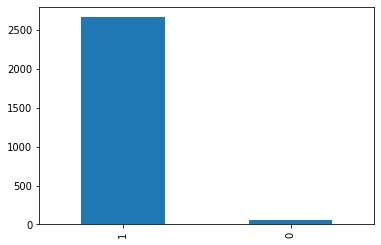

In [630]:
cnt_result = df['Result'].value_counts()
cnt_result.plot(kind='bar')

### Relationship between Gender and Result

Gender  Result
F       1         1400
        0           28
M       1         1266
        0           33
Name: Result, dtype: int64

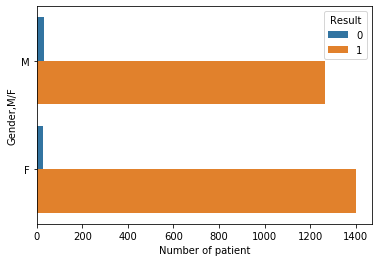

In [631]:
ax = sns.countplot(y='Gender', hue='Result', data=df)
ax.set(xlabel='Number of patient', ylabel="Gender,M/F")
df.groupby(['Gender'])['Result'].value_counts()

### Relationship between HKer_or_not and Result

HKer_or_not  Result
0            1           31
1            1         2635
             0           61
Name: Result, dtype: int64

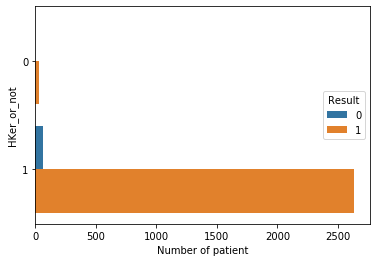

In [632]:
ax = sns.countplot(y='HKer_or_not', hue='Result', data=df)
ax.set(xlabel='Number of patient', ylabel="HKer_or_not")
df.groupby(['HKer_or_not'])['Result'].value_counts()
#1 = HKER, 0 = non-HKER

### Relationship between case_classification and Result

Case_classification  Result
0                    1          494
                     0            3
1                    1         2172
                     0           58
Name: Result, dtype: int64

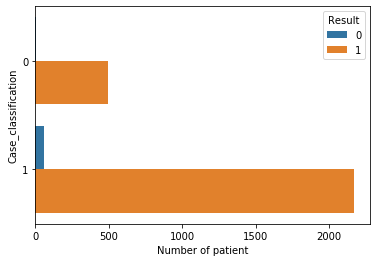

In [633]:
ax = sns.countplot(y='Case_classification', hue='Result', data=df)
ax.set(xlabel='Number of patient', ylabel="Case_classification")
df.groupby(['Case_classification'])['Result'].value_counts()
#1 = local case
#0 = import case 

### Relationship between Age and Result

[Text(0, 0.5, 'Age'), Text(0.5, 0, 'Result')]

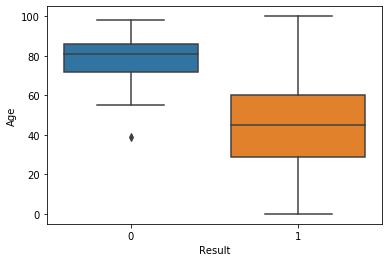

In [634]:
ax = sns.boxplot(x='Result', y='Age', data=df)
ax.set(xlabel='Result', ylabel='Age')

### Relationship between Time_Delta and Result

[Text(0, 0.5, 'Time_Delta'), Text(0.5, 0, 'Result')]

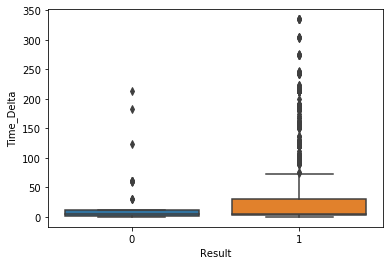

In [635]:
ax = sns.boxplot(x='Result', y='Time_Delta', data=df)
ax.set(xlabel='Result', ylabel='Time_Delta')

## Balancing the Dataset

In [636]:
# Get the dummy variable
df = pd.concat([df,pd.get_dummies(df['Gender'])], axis=1)
df.drop(['Gender'], axis=1, inplace=True)
df.head()

,Report_date,Date_of_onset,Age,Result,HKer_or_not,Case_classification,Confirmed/probable,Time_Delta,F,M
0,2020-01-23,2020-01-21,39,1,0,0,Confirmed,2,0,1
1,2020-01-23,2020-01-18,56,1,1,0,Confirmed,5,0,1
2,2020-01-24,2020-01-20,62,1,0,0,Confirmed,4,1,0
3,2020-01-24,2020-01-23,62,1,0,0,Confirmed,1,1,0
4,2020-01-24,2020-01-23,63,1,0,0,Confirmed,1,0,1


In [637]:
df.columns.values

array(['Report_date', 'Date_of_onset', 'Age', 'Result', 'HKer_or_not',
       'Case_classification', 'Confirmed/probable', 'Time_Delta', 'F',
       'M'], dtype=object)

In [638]:
from imblearn.under_sampling import RandomUnderSampler
import imblearn

x = df[['Age','HKer_or_not','Case_classification','Time_Delta','F','M']]
y = df['Result']

#Use random under sampling (RUS) method such that the resulting numbers of each 'Result' class are equal.
#RUS randomly removes samples from the majority class (in this case 'Result' = 1(Alive)) such that the number present
#equal that of the minority class 'Result' = 0(Death) such that they are now equal.
RUS = RandomUnderSampler()
x_resampled, y_resampled = RUS.fit_resample(x, y)

In [639]:
print(y_resampled.value_counts())
print(x_resampled[0:5])

1    61
0    61
Name: Result, dtype: int64
   Age  HKer_or_not  Case_classification  Time_Delta  F  M
0   39            1                    0           2  0  1
1   75            1                    0           5  1  0
2   78            1                    1          31  1  0
3   72            1                    1          31  0  1
4   55            1                    0          11  0  1


## Modeling

In [640]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_prp = preprocessing.StandardScaler().fit(x_resampled).transform(x_resampled)
x_prp[0:2]

array([[-1.08233049,  0.        , -3.34664011, -0.49145924, -1.06787213,
         1.06787213],
       [ 0.53839761,  0.        , -3.34664011, -0.42906796,  0.93644171,
        -0.93644171]])

In [641]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2181, 6) (2181,)
Test set: (546, 6) (546,)


### Logistic Regression

In [642]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.05).fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [643]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[5.96596244e-01, 4.03403756e-01],
       [5.31598509e-04, 9.99468401e-01],
       [3.04300855e-03, 9.96956991e-01],
       ...,
       [1.22528795e-04, 9.99877471e-01],
       [6.40099916e-05, 9.99935990e-01],
       [2.50219308e-03, 9.97497807e-01]])

In [644]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

jaccard_score_LR = jaccard_score(y_test, yhat)
f1_score_LR = f1_score(y_test, yhat, average='weighted')

print('The jaccard score is: ',jaccard_score_LR)
print('The F-1 score is: ',f1_score_LR)

The jaccard score is:  0.9779816513761468
The F-1 score is:  0.9687251523986219


### Decision Tree

In [645]:
from sklearn.datasets import load_iris
from sklearn import tree

DecisionTree = tree.DecisionTreeClassifier(max_depth = 6)
Decision_Tree = DecisionTree.fit(X_train, y_train)

yhat_DT = Decision_Tree.predict(X_test) #prediction
yhat_DT


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [646]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat_DT))
jaccard_score_DT = jaccard_score(y_test,yhat_DT)
f1_score_DT = f1_score(y_test, yhat_DT, average = 'weighted')
print('The jaccard score is: ',jaccard_score_DT)
print('The F-1 score is: ',f1_score_DT)

DecisionTrees's Accuracy:  0.9652014652014652
The jaccard score is:  0.9652014652014652
The F-1 score is:  0.9589047175254072


### K Nearest Neighbour Method

In [647]:
# finding a good K for the KNN model
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

K = 15
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

#We create Ks-15 classifiers, and test the accuracy of each classifer for each value of n neighbours.
#We print the mean accuracy for all classifiers and save the one with the best accuracy.
numTestsPerformed = 0
for n in range(5,K):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
    #Creating and testing numerous classifiers takes time, a loading bar is therefore created and displayed
    numTestsPerformed = numTestsPerformed + 1
    print("Loading: " + str(round(((numTestsPerformed / 10) * 100), 2)) + "%", end="\r")
mean_acc

array([0.        , 0.        , 0.        , 0.        , 0.96703297,
       0.96886447, 0.96703297, 0.96703297, 0.96703297, 0.96703297,
       0.96703297, 0.96520147, 0.97069597, 0.97069597])

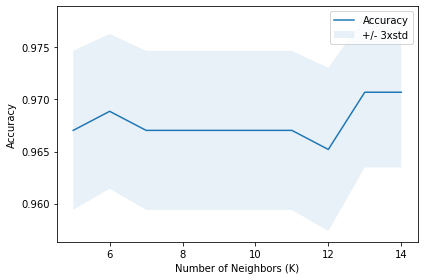

The best general accuracy was at 0.9706959706959707 with k= 13


In [648]:
# Visualize k-value over accuracy
plt.plot(range(5,K),mean_acc[4:25])
plt.fill_between(range(5,K),mean_acc[4:15] - 1 * std_acc[4:15],mean_acc[4:15] + 1 * std_acc[4:15], alpha=0.10)

#Plotting line graph displaying the accuracy of the classifier with each value K = n neighbours.
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

#Print classifier with the best accuracy.
print( "The best general accuracy was at", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [649]:
# build final KNN model
k = 24
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_hat_KNN = KNN.predict(X_test)

# full evalution
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

#Printing off evaluation metrics for K-NN classifier
acc_KNN = metrics.accuracy_score(y_test, y_hat_KNN)
jc_KNN = jaccard_score(y_test, y_hat_KNN)
fs_KNN = f1_score(y_test, y_hat_KNN, average='weighted')
print("Accuracy Score: ", acc_KNN)
print("Jaccard Score: ", jc_KNN)
print("F1 Score: ", fs_KNN)

Accuracy Score:  0.9761904761904762
Jaccard Score:  0.9761904761904762
F1 Score:  0.9644291451520368


In [650]:
method_list = ['KNN','DT','LR']
jaccard = [jc_KNN,
          jaccard_score_DT,
          jaccard_score_LR]

f1_score = [fs_KNN, f1_score_DT, f1_score_LR]
df_result = pd.DataFrame({'Model': method_list, 'Jaccard' : jaccard,'F1_Score':f1_score})
df_result

,Model,Jaccard,F1_Score
0,KNN,0.976190,0.964429
1,DT,0.965201,0.958905
2,LR,0.977982,0.968725
